In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<ipython-input-1-9b316c99b5cd>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [ ]:
df =  pd.read_excel("/content/Fatigue Dataset for Steel (1).xlsx")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Fatigue Dataset for Steel (1).xlsx'

In [ ]:
df.shape
df.info()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl. No.,437.0,219.000000,126.295289,1.000,110.000,219.000,328.000,437.000
NT,437.0,872.299771,26.212073,825.000,865.000,870.000,870.000,930.000
THT,437.0,737.643021,280.036541,30.000,845.000,845.000,855.000,865.000
THt,437.0,25.949657,10.263824,0.000,30.000,30.000,30.000,30.000
THQCr,437.0,10.654462,7.841437,0.000,8.000,8.000,8.000,24.000
CT,437.0,128.855835,281.743539,30.000,30.000,30.000,30.000,930.000
Ct,437.0,40.502059,126.924697,0.000,0.000,0.000,0.000,540.000
DT,437.0,123.699844,267.128933,30.000,30.000,30.000,30.000,903.333
Dt,437.0,4.843936,15.700076,0.000,0.000,0.000,0.000,70.200
QmT,437.0,35.491991,19.419277,30.000,30.000,30.000,30.000,140.000


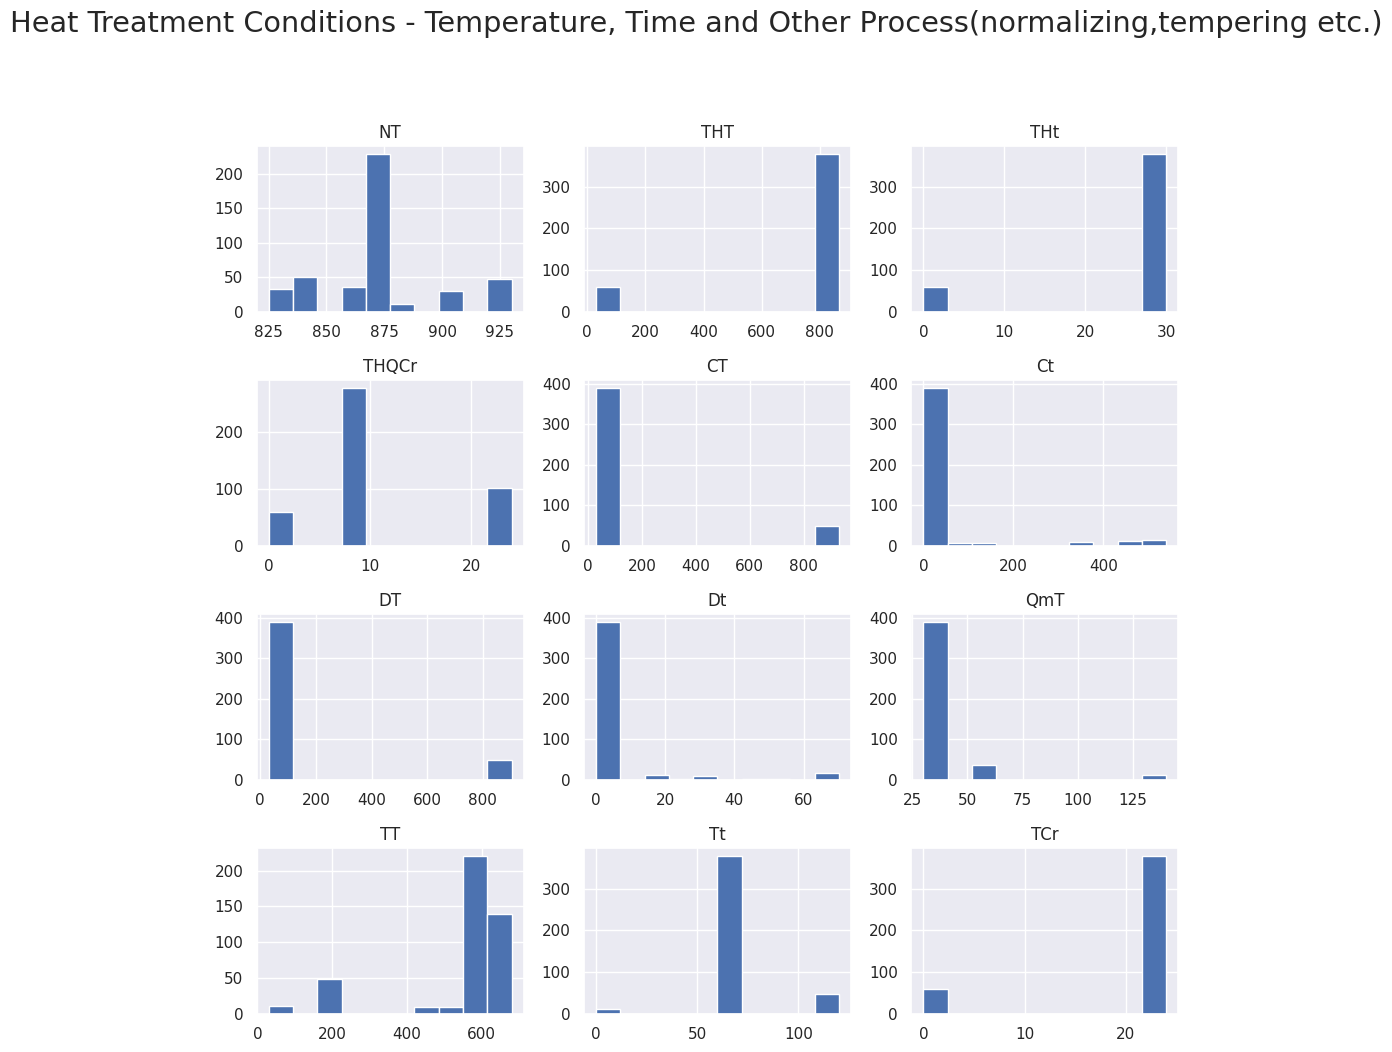

In [ ]:
df_1 = df[["C", "Si", "Mn", "P", "S", "Ni", "Cu", "Cr", "Mo"]]
df_2 = df[['NT', 'THT', 'THt', 'THQCr', 'CT', 'Ct', 'DT', 'Dt', 'QmT',
       'TT', 'Tt', 'TCr']]
sns.set(font_scale = 1)
df_2.hist(figsize=(10, 10));
plt.suptitle("Heat Treatment Conditions - Temperature, Time and Other Process(normalizing,tempering etc.)",
             x=0.5, y=1.05, ha='center', fontsize='xx-large');
plt.tight_layout();

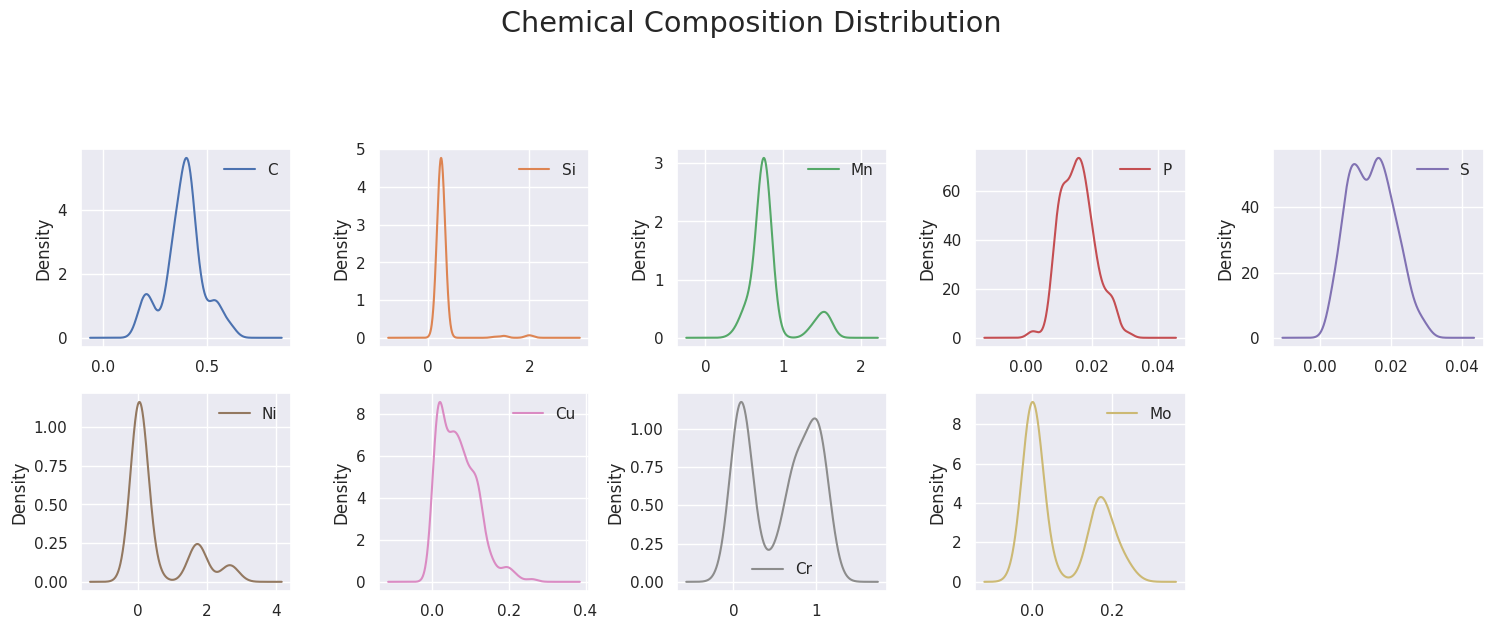

In [ ]:
df_1.plot(kind="density", layout=(6,5),subplots=True,sharex=False, sharey=False, figsize=(15,15));
plt.suptitle("Chemical Composition Distribution",
             x=0.5, y=1.05, ha='center', fontsize='xx-large');
plt.tight_layout()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
df.drop(columns=['Sl. No.'], inplace = True)
X = df.drop(["Fatigue"], axis = 1)
y = df["Fatigue"]

In [ ]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)
lm = LinearRegression()
lr_model = lm.fit(X_train, y_train)

In [ ]:
#R^2 Score with Cross Validation

cross_val_score1=cross_val_score(lr_model, X_train, y_train, cv=10, scoring='r2').mean() #verified score value for train model
print('Verified R2 value for Training model: ' + str(cross_val_score1))

cross_val_score2=cross_val_score(lr_model, X_test, y_test, cv=10, scoring='r2').mean() #verified score value for test model
print('Verified R2 value for Testing Model: ' + str(cross_val_score2))

Verified R2 value for Training model: 0.957171099344228
Verified R2 value for Testing Model: 0.9340089728997079


In [ ]:
#Rmse Score Value with Cross Validation


train_crs_val = np.sqrt(-cross_val_score(lr_model,
                X_train,
                y_train,
                cv = 10,
                scoring = "neg_mean_squared_error")).mean()

test_crs_val = np.sqrt(-cross_val_score(lr_model,
                X_test,
                y_test,
                cv = 10,
                scoring = "neg_mean_squared_error")).mean()

print("train cross val rmse:{}\ntest cross val rmse:{}".format(train_crs_val,test_crs_val))

train cross val rmse:34.81610417420309
test cross val rmse:39.06567484394303


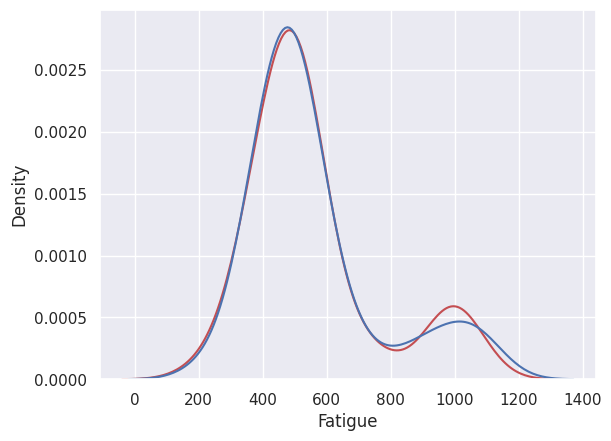

In [ ]:
ax1 = sns.distplot(lr_model.predict(X_test), hist=False, color="r", label="Predict Values")
sns.distplot(y_test, hist=False, color="b", label="Actual Values" , ax=ax1);

In [ ]:
d = {'R^2 Score ': [0.93], 'Rmse Score': [0.39]}
lr_data = pd.DataFrame(data=d)
lr_data

,R^2 Score,Rmse Score
0,0.93,0.39


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor().fit(X_train, y_train)
print("R^2 values:{}".format(knn_model.score(X_test, y_test)))
y_pred = knn_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("rmse: {}".format(rmse))

R^2 values:0.9048832092283499
rmse: 62.710148518981576


In [ ]:
# Model Tuning

k = {'n_neighbors': np.arange(1,30,1)}

knn_model = KNeighborsRegressor()

cv_model = GridSearchCV(knn_model, k, cv = 10)

cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [ ]:
knn_model_tuned = KNeighborsRegressor(n_neighbors = cv_model.best_params_["n_neighbors"])
knn_model_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
print("R^2 values:{}".format(knn_model_tuned.score(X_test, y_test)))
y_pred = knn_model_tuned.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("rmse: {}".format(rmse))

R^2 values:0.9195948039771817
rmse: 57.656900556812644


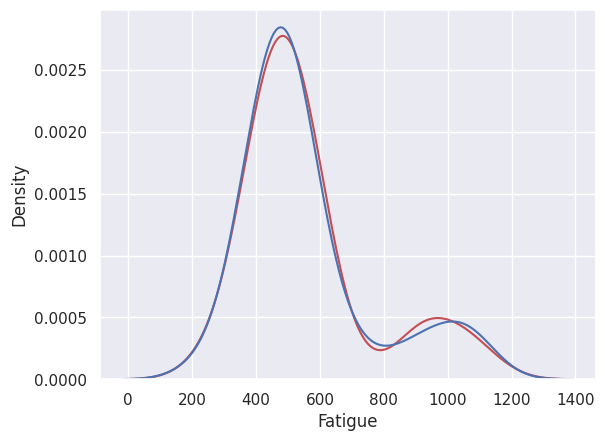

In [ ]:
ax1 = sns.distplot(knn_model_tuned.predict(X_test), hist=False, color="r", label="Predict Values")
sns.distplot(y_test, hist=False, color="b", label="Actual Values" , ax=ax1);


In [ ]:
d = {'R^2 Score ': [0.91], 'Rmse Score': [0.57]}
knn_data = pd.DataFrame(data=d)
knn_data

,R^2 Score,Rmse Score
0,0.91,0.57


In [ ]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test,
                            num_iteration = lgbm_model.best_iteration_)

print("R^2 values:{}".format(lgbm_model.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("rmse: {}".format(rmse))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 349, number of used features: 25
[LightGBM] [Info] Start training from score 552.538682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [ ]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=2, n_jobs = -1, verbose = 2)
lgbm_cv_model.fit(X_train, y_train)


Fitting 2 folds for each of 960 candidates, totalling 1920 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 349, number of used features: 25
[LightGBM] [Info] Start training from score 552.538682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

GridSearchCV(cv=2, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [ ]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 1000}

In [ ]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1,
                           max_depth = 3,
                           n_estimators = 1000,
                          colsample_bytree = 0.5)
lgbm_tuned = lgbm_tuned.fit(X_train,y_train)
y_pred = lgbm_tuned.predict(X_test)
print("R^2 values:{}".format(lgbm_tuned.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("rmse: {}".format(rmse))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 349, number of used features: 25
[LightGBM] [Info] Start training from score 552.538682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

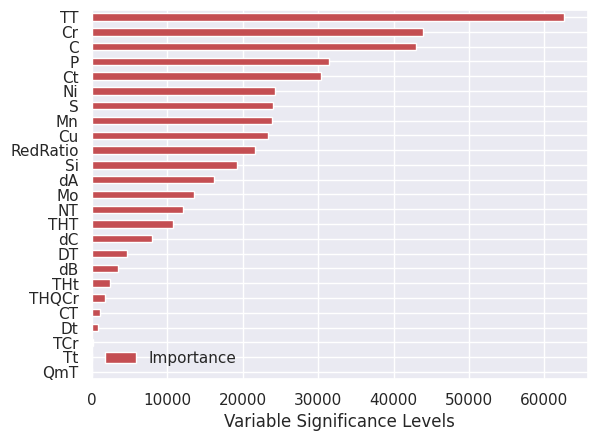

In [ ]:
Importance = pd.DataFrame({"Importance": lgbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind ="barh", color = "r");

plt.xlabel("Variable Significance Levels");

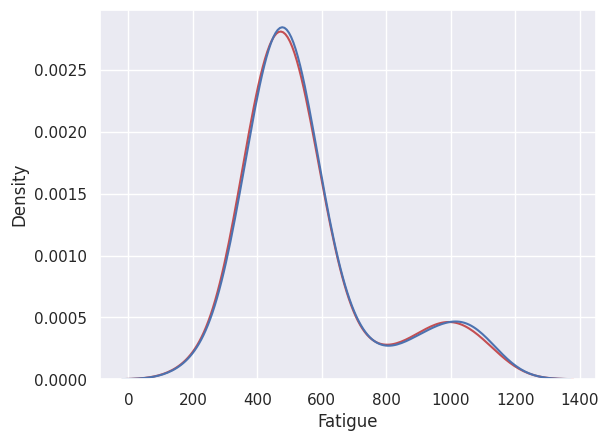

In [ ]:
ax1 = sns.distplot(lgbm_tuned.predict(X_test), hist=False, color="r", label="Predict Values")
sns.distplot(y_test, hist=False, color="b", label="Actual Values" , ax=ax1);

In [ ]:
d = {'R^2 Score ': [0.99], 'Rmse Score': [0.18]}
lgbm_data = pd.DataFrame(data=d)
lgbm_data

,R^2 Score,Rmse Score
0,0.99,0.18


In [ ]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.9 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)
y_pred = catb_model.predict(X_test)
print("R^2 values:{}".format(catb_model.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("rmse: {}".format(rmse))


Learning rate set to 0.034669
0:	learn: 177.1308220	total: 67.3ms	remaining: 1m 7s
1:	learn: 173.4048808	total: 68.7ms	remaining: 34.3s
2:	learn: 169.2098633	total: 69.4ms	remaining: 23.1s
3:	learn: 165.3818907	total: 78ms	remaining: 19.4s
4:	learn: 161.6126833	total: 78.6ms	remaining: 15.6s
5:	learn: 158.0212139	total: 79.1ms	remaining: 13.1s
6:	learn: 154.7510401	total: 93.9ms	remaining: 13.3s
7:	learn: 151.8633626	total: 97.4ms	remaining: 12.1s
8:	learn: 148.5639325	total: 98.7ms	remaining: 10.9s
9:	learn: 145.3781252	total: 107ms	remaining: 10.6s
10:	learn: 141.7894875	total: 109ms	remaining: 9.76s
11:	learn: 138.5610864	total: 110ms	remaining: 9.08s
12:	learn: 135.7082852	total: 111ms	remaining: 8.4s
13:	learn: 132.9209690	total: 113ms	remaining: 7.99s
14:	learn: 130.2855047	total: 114ms	remaining: 7.48s
15:	learn: 127.8360672	total: 114ms	remaining: 7.04s
16:	learn: 125.1616082	total: 121ms	remaining: 7s
17:	learn: 122.6185765	total: 122ms	remaining: 6.64s
18:	learn: 120.5942737	

In [ ]:
#Model Tuning

catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=2, n_jobs = -1, verbose = 2)

catb_cv_model.fit(X_train, y_train)

Fitting 2 folds for each of 96 candidates, totalling 192 fits
0:	learn: 175.0274396	total: 3.24ms	remaining: 6.48s
1:	learn: 169.7313542	total: 4.73ms	remaining: 4.72s
2:	learn: 164.0296104	total: 5.67ms	remaining: 3.77s
3:	learn: 158.0419120	total: 6.49ms	remaining: 3.24s
4:	learn: 153.1976631	total: 6.8ms	remaining: 2.71s
5:	learn: 147.7851948	total: 7.15ms	remaining: 2.38s
6:	learn: 142.6091922	total: 7.89ms	remaining: 2.25s
7:	learn: 138.4851495	total: 8.78ms	remaining: 2.19s
8:	learn: 133.5038508	total: 9.67ms	remaining: 2.14s
9:	learn: 130.0326776	total: 10.5ms	remaining: 2.08s
10:	learn: 126.3008798	total: 11.2ms	remaining: 2.03s
11:	learn: 122.2057903	total: 12.3ms	remaining: 2.04s
12:	learn: 118.9216003	total: 13.5ms	remaining: 2.06s
13:	learn: 116.0649565	total: 14.5ms	remaining: 2.06s
14:	learn: 112.5286505	total: 15.5ms	remaining: 2.06s
15:	learn: 109.4411972	total: 16.6ms	remaining: 2.05s
16:	learn: 106.8645165	total: 17.3ms	remaining: 2.02s
17:	learn: 103.3250298	total: 1

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x7af4d12e3fa0>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6, 7, 8],
                         'iterations': [200, 500, 1000, 2000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1]},
             verbose=2)

In [ ]:
catb_cv_model.best_params_

{'depth': 5, 'iterations': 2000, 'learning_rate': 0.05}

In [ ]:
catb_tuned = CatBoostRegressor(iterations = 1000,
                               learning_rate = 0.05,
                               depth = 4)
catb_tuned = catb_tuned.fit(X_train,y_train)
y_pred = catb_tuned.predict(X_test)
print("R^2 values:{}".format(catb_tuned.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("rmse: {}".format(rmse))

0:	learn: 175.2541395	total: 613us	remaining: 613ms
1:	learn: 169.8203652	total: 1.69ms	remaining: 845ms
2:	learn: 164.3307494	total: 2.38ms	remaining: 792ms
3:	learn: 158.4022795	total: 3.08ms	remaining: 767ms
4:	learn: 152.8646030	total: 4.06ms	remaining: 809ms
5:	learn: 147.6213425	total: 4.78ms	remaining: 791ms
6:	learn: 142.9034052	total: 5.44ms	remaining: 771ms
7:	learn: 138.2581849	total: 6.1ms	remaining: 757ms
8:	learn: 133.6925525	total: 6.9ms	remaining: 760ms
9:	learn: 129.6215527	total: 7.71ms	remaining: 763ms
10:	learn: 125.7119853	total: 8.11ms	remaining: 729ms
11:	learn: 122.4689340	total: 9.09ms	remaining: 748ms
12:	learn: 118.8702503	total: 9.79ms	remaining: 743ms
13:	learn: 114.9416395	total: 10.5ms	remaining: 741ms
14:	learn: 112.5584509	total: 11.2ms	remaining: 736ms
15:	learn: 109.8740909	total: 11.9ms	remaining: 730ms
16:	learn: 107.0222189	total: 12.5ms	remaining: 725ms
17:	learn: 104.1129430	total: 13.2ms	remaining: 721ms
18:	learn: 101.6766639	total: 14.1ms	rema

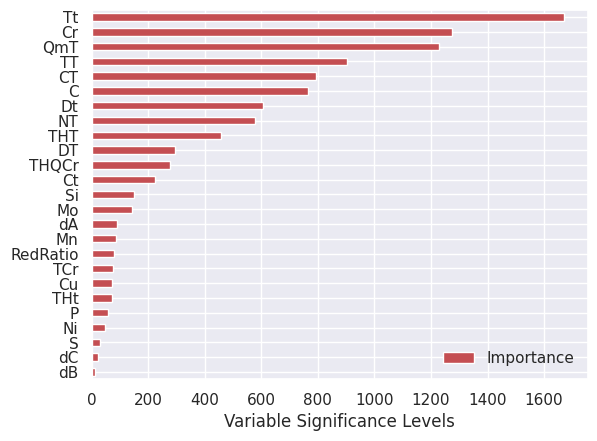

In [ ]:
Importance = pd.DataFrame({"Importance": catb_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind ="barh", color = "r");

plt.xlabel("Variable Significance Levels");


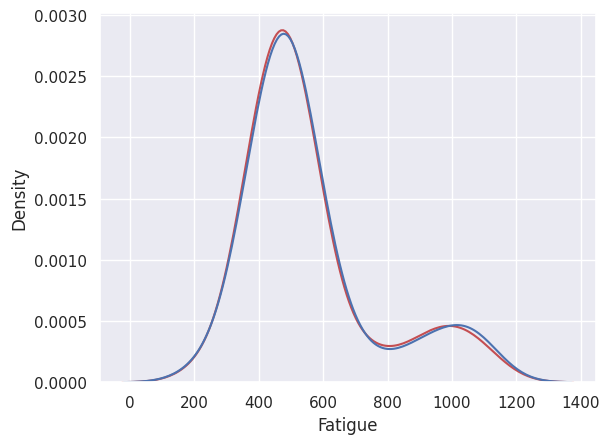

In [ ]:
ax1 = sns.distplot(catb_tuned.predict(X_test), hist=False, color="r", label="Predict Values")
sns.distplot(y_test, hist=False, color="b", label="Actual Values" , ax=ax1);


In [ ]:
d = {'R^2 Score ': [0.99], 'Rmse Score': [0.18]}
catb_data = pd.DataFrame(data=d)
catb_data

,R^2 Score,Rmse Score
0,0.99,0.18


In [ ]:
models = [

    lr_model,
    knn_model_tuned,
    lgbm_tuned,
    catb_tuned,


]


for model in models:
    name = model.__class__.__name__
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("-"*28)
    print(name + ":" )
    print("Rmse: {:.4%}".format(rmse))

----------------------------
LinearRegression:
Rmse: 3216.1540%
----------------------------
KNeighborsRegressor:
Rmse: 5765.6901%
----------------------------
LGBMRegressor:
Rmse: 1954.2398%
----------------------------
CatBoostRegressor:
Rmse: 1871.7650%


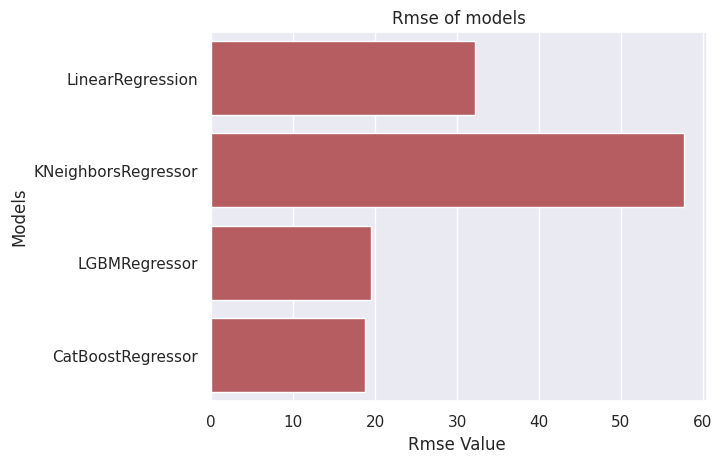

In [ ]:
result = []

results = pd.DataFrame(columns= ["Models","Rmse"])

for model in models:
    name = model.__class__.__name__
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    result = pd.DataFrame([[name, rmse]], columns= ["Models","Rmse"])
    results = pd.concat([results, result], ignore_index=True)


sns.barplot(x= 'Rmse', y = 'Models', data=results, color="r")
plt.xlabel('Rmse Value ')
plt.title('Rmse of models');

In [ ]:
models = [
    lr_model,
    knn_model_tuned,
    lgbm_tuned,
    catb_tuned,

]


for model in models:
    name = model.__class__.__name__
    r2 = model.score(X_test, y_test)
    print("-"*28)
    print(name + ":" )
    print("R^2 Score: {:.4%}".format(r2))


----------------------------
LinearRegression:
R^2 Score: 97.4982%
----------------------------
KNeighborsRegressor:
R^2 Score: 91.9595%
----------------------------
LGBMRegressor:
R^2 Score: 99.0763%
----------------------------
CatBoostRegressor:
R^2 Score: 99.1526%


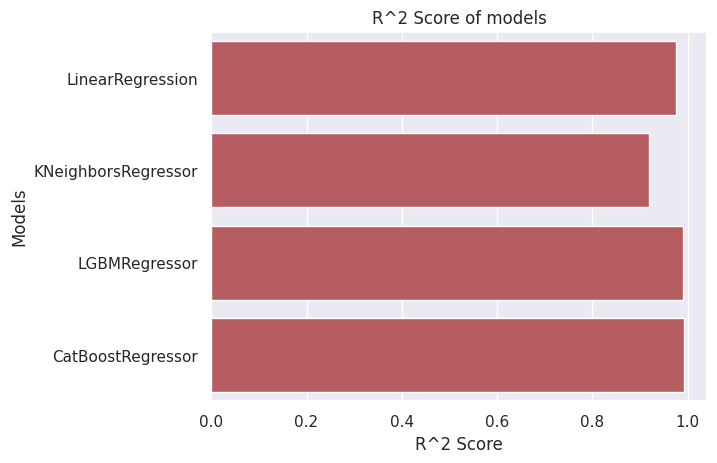

In [ ]:
result = []

results = pd.DataFrame(columns= ["Models","R^2 Score"])

for model in models:
    name = model.__class__.__name__
    r2 = model.score(X_test, y_test)
    result = pd.DataFrame([[name, r2]], columns= ["Models","R^2 Score"])
    results = pd.concat([results, result], ignore_index=True)


sns.barplot(x= 'R^2 Score', y = 'Models', data=results, color="r")
plt.xlabel('R^2 Score')
plt.title('R^2 Score of models');